# **(2) Bivariate Exploratory Data Analysis (EDA):**

## **Import Used Libraries and Modules:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import adjustText as adt

## **Export Target Dataframe (cleaned_bayut_egypt.csv):**

In [2]:
df = pd.read_csv('D:\\IT Courses\\Data Analysis Courses\\Data Analysis Projects\\Bayut Egypt Real Estate Project\\Bayut_Egypt_Real_Estate_Website_Data_Analysis_Project\\Dataset\\cleaned_bayut_egypt.csv')

## **(2) Bivariate Analysis:**

### **2.1. Districts VS. Median Price Analysis:**

In [3]:
districts_price_group = df.groupby(
    by=['general_district']
).agg(
    district_frequency=('general_district', 'size'),
    median_price=('price', 'median')
).sort_values(
    by='district_frequency',
    ascending=False
).drop(
    index='Other'
).head(20).sort_values(
    by=['median_price'],
    ascending=False
)

**(1) Bar Chart Plot:**

Text(0.5, 1.0, 'Districts Vs. Median Apartment Price')

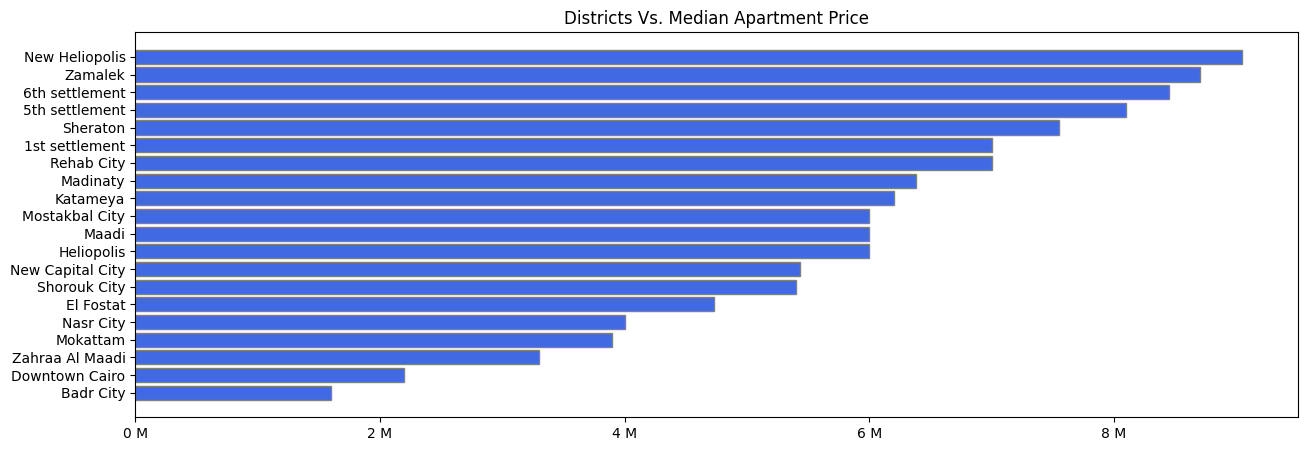

In [4]:
plt.figure(figsize=(15,5))
plt.barh(
    districts_price_group.index,
    districts_price_group['median_price'],
    color='royalblue',
    edgecolor='grey'
)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x / 1000000)} M')))
plt.title('Districts Vs. Median Apartment Price')

**(2) Heatmap Plot:**

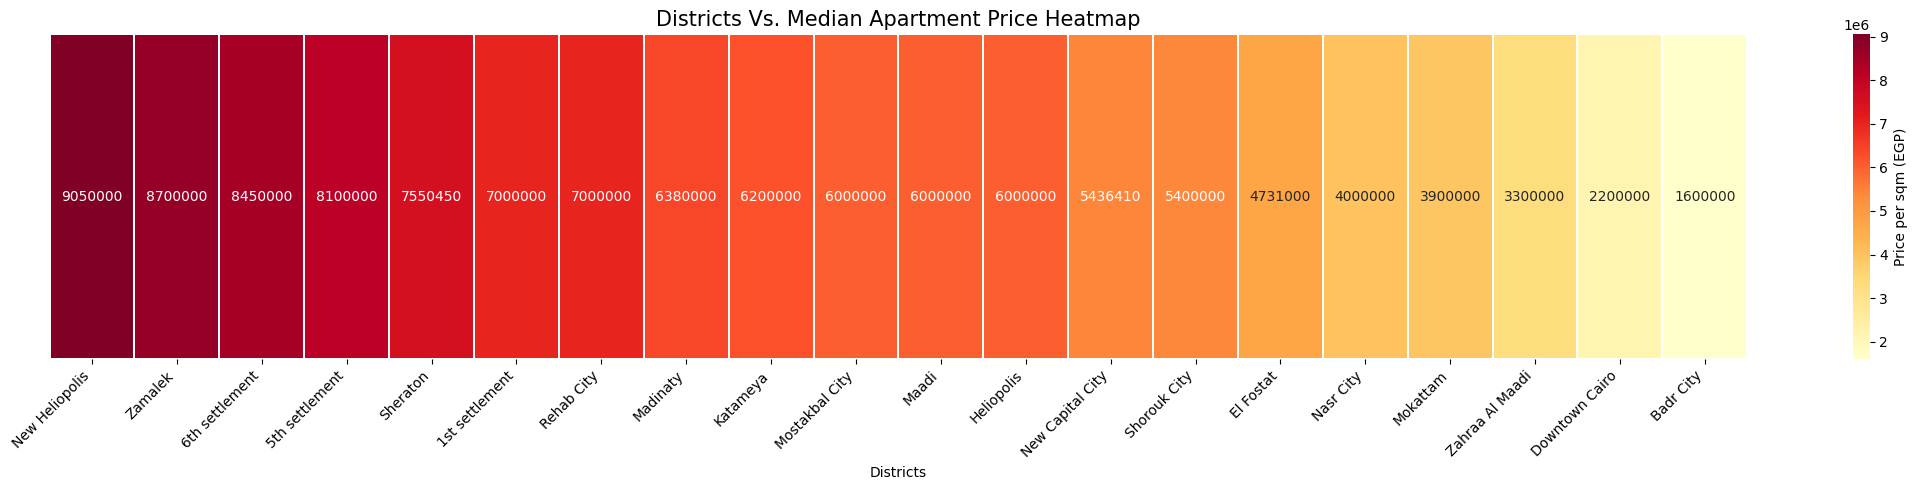

In [5]:
plt.figure(figsize=(22, 5))
sns.heatmap(
    (districts_price_group.drop(columns='district_frequency')).T,  
    annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.2,
    cbar_kws={'label': 'Price per sqm (EGP)'}
)
plt.title("Districts Vs. Median Apartment Price Heatmap", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks([])
plt.xlabel('Districts')
plt.tight_layout()
plt.show()

**Actionable Insights:**

- **Zamalek and New Heliopolis** are identified as the most expensive districts. **Focusing on luxury developments and premium marketing strategies in these areas to attract high-end buyers and maximize profitability**.

- **The 6th Settlement, the 5th Settlement, and Sheraton** are noted for their high median apartment prices. Focus on upscale projects and investments in these districts to cater to affluent market segments.

- Districts such as **the 1st Settlement, Rehab City, and Madinaty** offer moderate pricing. These areas present balanced opportunities for mid-range developments, appealing to a **wider audience**.

### **2.2. Districts VS. Median Price Per Square Meter (Sq.M.) Analysis:**

**(1) Bar Chart Plot:**

In [6]:
districts_price_m2_group= df.groupby(
    by=['general_district']
).agg(
    frequency=('general_district', 'size'),
    median_m2_price=('price_per_sq_m_2', 'median')
).sort_values(
    by=['frequency'],
    ascending=False
).drop(
    index='Other'
).head(20).sort_values(
    by=['median_m2_price'],
    ascending=False
)

Text(0.5, 1.0, 'Districts Vs. Median Apartment Price Per Square Meter (Sq.M.)')

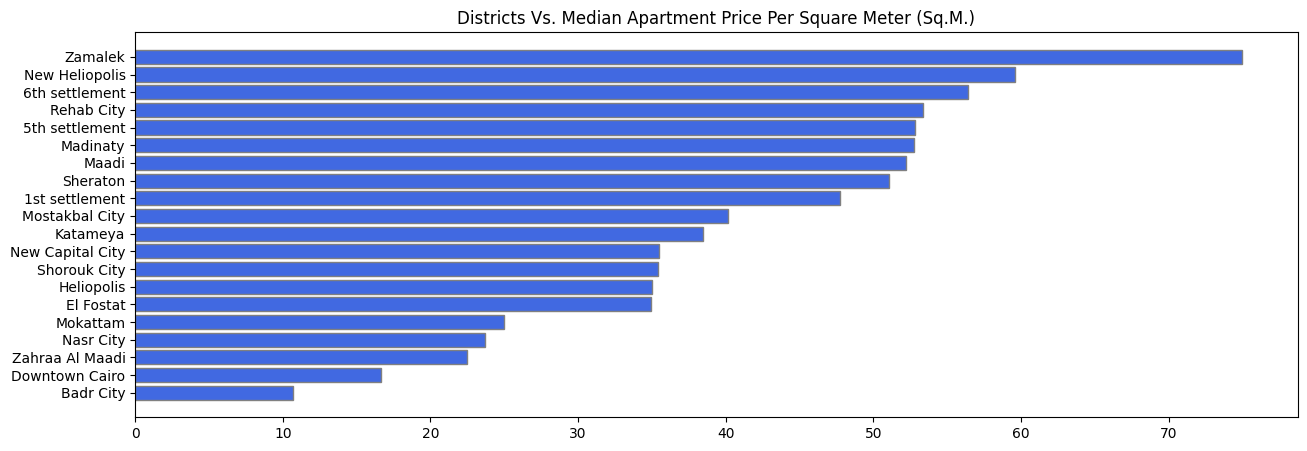

In [7]:
plt.figure(figsize=(15,5))
plt.barh(
    districts_price_m2_group.index,
    districts_price_m2_group['median_m2_price'],
    color='royalblue',
    edgecolor='grey'
)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x / 1000)}')))
plt.title('Districts Vs. Median Apartment Price Per Square Meter (Sq.M.)')

**(2) Heatmap Plot:**

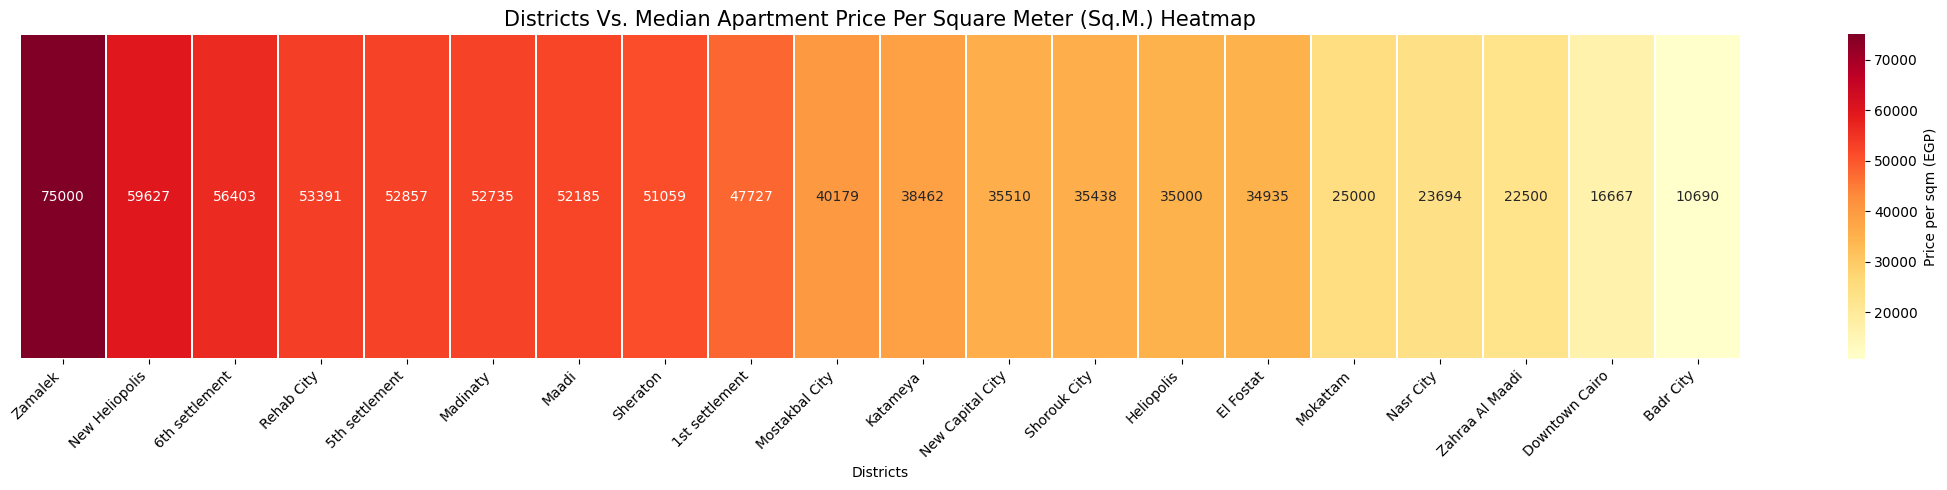

In [8]:
plt.figure(figsize=(22, 5))
sns.heatmap(
    (districts_price_m2_group.drop(columns='frequency')).T,  
    annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.2,
    cbar_kws={'label': 'Price per sqm (EGP)'}
)
plt.title("Districts Vs. Median Apartment Price Per Square Meter (Sq.M.) Heatmap", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks([])
plt.xlabel('Districts')
plt.tight_layout()
plt.show()

**Actionable Insights:**

- **Zamalek and New Heliopolis** are the most expensive districts per square meter. **Focus on luxury developments and premium marketing strategies in these areas to attract high-end buyers and maximize profitability**.

- **The 6th Settlement and Rehab City** also exhibits high median apartment prices per square meter. **These areas should be prioritized for upscale projects and investments to cater to affluent market segments.**

- Districts such as **Madinaty, Maadi, and Sheraton offer moderate pricing per square meter**. These areas present balanced opportunities for mid-range developments, appealing to a wider audience.

- **Badr City, Downtown Cairo, and Zahraa Al Maadi are among the districts with the lowest median apartment prices per square meter.**


### **2.3. Apartment Configuration Vs. Median Price:**

In [30]:
apartment_configuration = df.groupby(
    by=['apartment_configuration']
).agg(
    median_price=('price', 'median'),
    frequency=('apartment_configuration', 'size')
).sort_values(
    by=['frequency'],
    ascending=False
).drop(
    index=[
        '1 - 2',
        '4 - 2',
        '2 - 4',
        '4 - 1'
        ]
).sort_values(
    by=['median_price'],
    ascending=False
).reset_index()

apartment_configuration

,apartment_configuration,median_price,frequency
0,4 - 4,10000000.0,82
1,3 - 4,8687000.0,68
2,2 - 3,8200000.0,243
3,4 - 3,7910600.0,205
4,3 - 3,7575000.0,2245
5,2 - 2,7100000.0,1376
6,3 - 2,6500000.0,2009
7,1 - 1,5020000.0,328
8,2 - 1,4550000.0,406
9,3 - 1,4425000.0,100


Text(0.5, 0, 'Median Price (Million)')

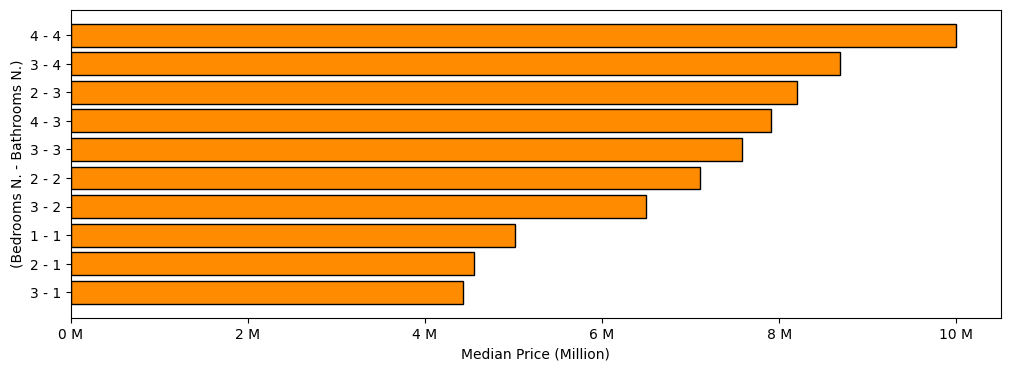

In [31]:
plt.figure(figsize=(12,4))
plt.barh(
    apartment_configuration.sort_values(by=['median_price'], ascending=False)['apartment_configuration'],
    apartment_configuration.sort_values(by=['median_price'], ascending=False)['median_price'],
    color='darkorange',
    edgecolor='black'
)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x / 1000000)} M')))
plt.ylabel('(Bedrooms N. - Bathrooms N.)')
plt.xlabel('Median Price (Million)')

In [11]:
df.columns

Index(['real_estate_type', 'district', 'governorate', 'area_m2',
       'bedrooms_number', 'bathrooms_number', 'price', 'general_district',
       'apartment_configuration', 'bathroom_bedroom_ratio',
       'price_per_sq_m_2'],
      dtype='object')

In [12]:
'area_m2',
'bedrooms_number', 'bathrooms_number', 'price', 'general_district',
'apartment_configuration', 'bathroom_bedroom_ratio',
'price_per_sq_m_2'

'price_per_sq_m_2'

In [23]:
district_bathroom_bedroom_ratio = df.groupby(
    by=['general_district']
).agg(
    median_bathroom_bedroom_ratio=('bathroom_bedroom_ratio', 'median'),
    frequency=('bathroom_bedroom_ratio', 'size')
).drop(
    index='Other'
).sort_values(
    by=['frequency'],
    ascending=False
).sort_values(
    by=['median_bathroom_bedroom_ratio'],
    ascending=False
).reset_index()

district_bathroom_bedroom_ratio

,general_district,median_bathroom_bedroom_ratio,frequency
0,5th settlement,1.000,2943
1,New Capital City,1.000,698
2,Mostakbal City,1.000,619
3,1st settlement,1.000,603
4,Shorouk City,1.000,261
5,Zahraa Al Maadi,1.000,65
6,Katameya,1.000,179
7,Sheraton,1.000,130
8,6th settlement,1.000,88
9,Maadi,1.000,66


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, '5th settlement'),
  Text(1, 0, 'New Capital City'),
  Text(2, 0, 'Mostakbal City'),
  Text(3, 0, '1st settlement'),
  Text(4, 0, 'Shorouk City'),
  Text(5, 0, 'Zahraa Al Maadi'),
  Text(6, 0, 'Katameya'),
  Text(7, 0, 'Sheraton'),
  Text(8, 0, '6th settlement'),
  Text(9, 0, 'Maadi'),
  Text(10, 0, 'Mokattam'),
  Text(11, 0, 'El Fostat'),
  Text(12, 0, 'New Heliopolis'),
  Text(13, 0, 'Boulaq Abo El Ela'),
  Text(14, 0, 'Zamalek'),
  Text(15, 0, 'Rehab City'),
  Text(16, 0, 'Obour City'),
  Text(17, 0, 'Al Manial'),
  Text(18, 0, '3rd settlement'),
  Text(19, 0, 'Madinaty'),
  Text(20, 0, 'Nasr City'),
  Text(21, 0, 'Heliopolis'),
  Text(22, 0, 'Badr City'),
  Text(23, 0, 'Downtown Cairo'),
  Text(24, 0, 'Almazah'),
  Text(25, 0, 'New Nozha'),
  Text(26, 0, 'Garden City'),
  Text(27, 0, 'Darb Al-Ahmar'),
  Tex

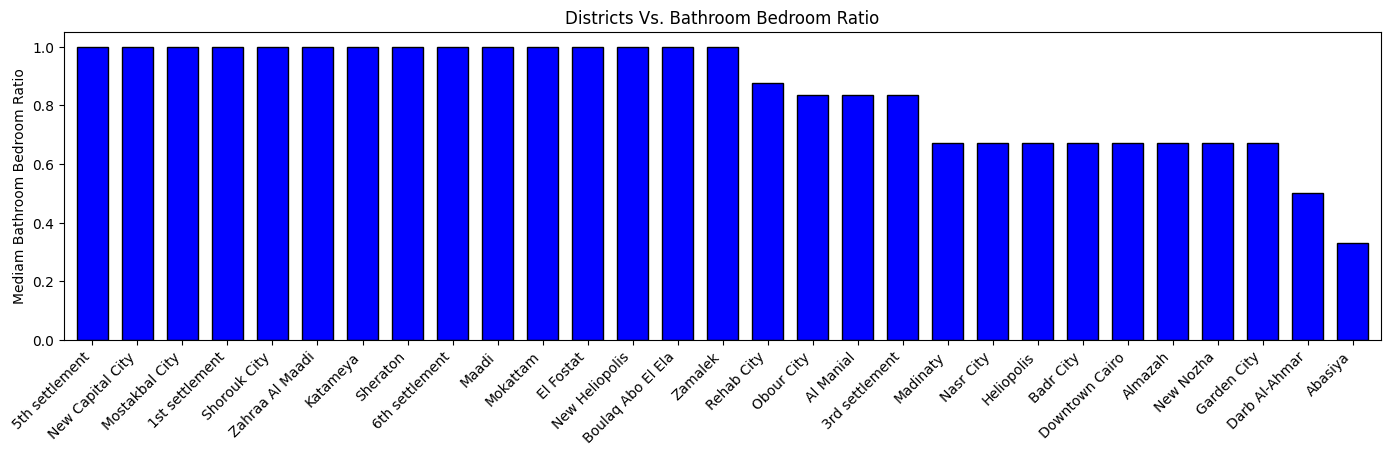

In [24]:
plt.figure(figsize=(17,4))
plt.bar(
    district_bathroom_bedroom_ratio['general_district'],
    district_bathroom_bedroom_ratio['median_bathroom_bedroom_ratio'],
    width=0.7,
    color='blue',
    edgecolor='black'
)

plt.margins(x=0.01)
plt.title('Districts Vs. Bathroom Bedroom Ratio')
plt.ylabel('Mediam Bathroom Bedroom Ratio')
plt.xticks(rotation=45, ha='right')

Apartments with 4 bedrooms and 4 bathrooms have the highest median price.
The median price generally increases with the number of bedrooms and bathrooms.
Apartments with 3 bedrooms and 1 bathroom have the lowest median price.
Adding an extra bathroom to the same number of bedrooms tends to increase the median price.
The price difference between 4 bedrooms with 3 bathrooms and 4 bedrooms with 4 bathrooms is significant.
Apartments with 2 bedrooms and 1 bathroom are priced lower than those with 2 bedrooms and 2 bathrooms.
The median price for 3-bedroom apartments increases noticeably with each additional bathroom.


The bar chart shows the median bathroom-to-bedroom ratio across various districts. Here are some concise insights:

The 5th Settlement, New Capital City, and Mostakbal City have the highest bathroom-to-bedroom ratio at 1.0.
Several districts, including Sheraton, Maadi, and Mokattam, also maintain a high ratio close to 1.0.
Abasiya has the lowest median bathroom-to-bedroom ratio.
There is a noticeable drop in the ratio starting from Madinat Nasr City to Abasiya.
Most districts have a bathroom-to-bedroom ratio above 0.6.
The 3rd Settlement and New Cairo have relatively lower ratios compared to the top districts.
The ratio tends to cluster around certain values, indicating common trends in apartment configurations within these districts.